# Model 2 - training with the title as a label



In [5]:
# Get the data from file and split into titles and texts
data = open('Poems.txt', encoding="utf8").read() 
line_by_line = data.split('\n')
titles = []
texts = []
text = ""
for idx, line in enumerate(line_by_line):
    completed = False
    if line.startswith('\"'):
        titles.append(line)
        completed = True
        if completed == True and idx != 0:
            texts.append(text)
            text = ""
    elif not line.startswith('by'):
        text += line + "\n"     

print(titles)
print(texts)

['"SONNET XVIII"', '"SONNET LXV"', '"SONNET CXVI"', '"Auguries of Innocence"', '"The Marriage of Heaven and Hell"', '"When I Heard the Learn’d Astronomer"', '"O Captain! My Captain!"', '"CLANCY OF THE OVERFLOW"', '"SONG OF THE ARTESIAN WATER"', '"STOPPING BY WOODS ON A SNOWY EVENING"', '"FIRE AND ICE"', '"WE REAL COOL"', '"THE BEAN EATERS"', '"THE NEGRO SPEAKS OF THE RIVERS"', '"DREAM DEFERRED"', '"LES FEUILLES MORTES"', '"FAMILY LIFE"', '"BREAKFAST"', '"CHARLIE PARKER"', '"CONEY ISLAND OF THE MIND #5"', '"A SUPERMARKET IN CALIFORNIA"', '"AMERICA"', '"FREDERICK DOUGLASS"', '"AMERICAN HISTORY"', '"DEAR JOHN, DEAR COLTRANE"', '"THE ROCK CRIES OUT TO US TODAY"', '"THE BRIDGE"', '"A WAS AN ARCHER"', '"AS WET AS A FISH"', '"THE FATHER\'S TREASURE"', '"FOR WANT OF A NAIL"', '"HORSE SENSE"', '"IF ALL THE SEAS WERE ONE SEA"', '"LIVING" ', '"THE HAPPY LIFE"', '"MY MIND TO ME A KINGDOM IS"', '"THE CORN" ', '"WHEN IN DISGRACE... "', '"THE MAN OF LIFE UPRIGHT"', '"SONG IN TIME OF PLAGUE"', '"A HAP

In [39]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import matplotlib.pyplot as plt
import os


# Tokenize the texts and the titles
tokenizer = Tokenizer()
tokenizer.fit_on_texts(titles + texts)
# Gets the number of unique words 
vocab_size = len(tokenizer.word_index) + 1

# Prepare input sequences
sequences = []
for title, text in zip(titles, texts):
    sequence = tokenizer.texts_to_sequences([title + " " + text])[0]
    for i in range(1, len(sequence)):
        sequences.append(sequence[:i + 1])

# Pad sequences with zeroes
max_sequence_len = max(len(x) for x in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding="pre")

# Features and labels
X = padded_sequences[:, :-1]
y = tf.keras.utils.to_categorical(padded_sequences[:, -1], num_classes=vocab_size)


In [44]:

# Build the RNN model with LSTM layers
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=100, input_length=max_sequence_len - 1),
    LSTM(128, return_sequences=True),
    LSTM(128),
    Dense(128, activation="relu"),
    Dense(vocab_size, activation="softmax"),
])

callback_path = "checkpoint.keras"
callback_dir = os.path.dirname(callback_path)
callback = tf.keras.callbacks.ModelCheckpoint(filepath=callback_path, monitor='loss',
                                                 save_best_only=True,
                                                 verbose=1)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model on the data
model_history = model.fit(X, y, epochs=50, verbose=1, callbacks=[callback])
model.save('second_model.keras')

Epoch 1/50
668/668 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0602 - loss: 7.0881
Epoch 1: loss improved from inf to 6.85067, saving model to checkpoint.keras
668/668 ━━━━━━━━━━━━━━━━━━━━ 870s 1s/step - accuracy: 0.0602 - loss: 7.0877
Epoch 2/50
668/668 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0636 - loss: 6.4167
Epoch 2: loss improved from 6.85067 to 6.44235, saving model to checkpoint.keras
668/668 ━━━━━━━━━━━━━━━━━━━━ 846s 1s/step - accuracy: 0.0636 - loss: 6.4167
Epoch 3/50
668/668 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0663 - loss: 6.2452
Epoch 3: loss improved from 6.44235 to 6.26292, saving model to checkpoint.keras
668/668 ━━━━━━━━━━━━━━━━━━━━ 905s 1s/step - accuracy: 0.0664 - loss: 6.2452
Epoch 4/50
668/668 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0746 - loss: 6.0970
Epoch 4: loss improved from 6.26292 to 6.11796, saving model to checkpoint.keras
668/668 ━━━━━━━━━━━━━━━━━━━━ 922s 1s/step - accuracy: 0.0746 - loss: 6.0971
Epoch 5/50
668/668 ━━━━━━━━━━━━━━━━━

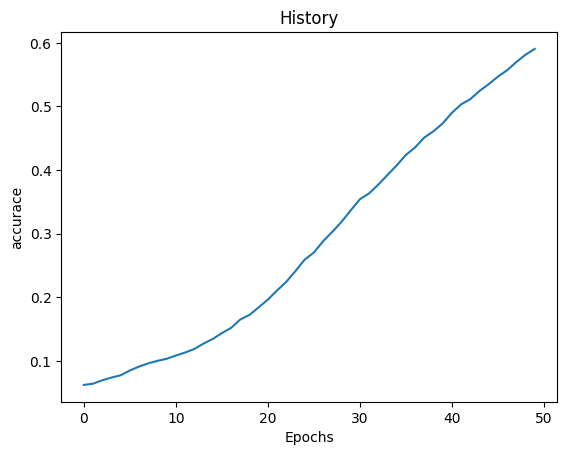

In [58]:
plt.plot(model_history.history['accuracy'])
plt.title('History')
plt.xlabel('Epochs')
plt.ylabel('accurace')
plt.show()

In [ ]:
callback_path_2 = "checkpoint_2.keras"
callback_dir_2 = os.path.dirname(callback_path_2)
callback_2 = tf.keras.callbacks.ModelCheckpoint(filepath=callback_path_2, monitor='loss',
                                                 save_best_only=True,
                                                 verbose=1)

# Train the model again on the same training data to improve accuracy and loss
model_history = model.fit(X, y, epochs=10, verbose=1, callbacks=[callback_2])
model.save('second_model_2.keras')

Epoch 1/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6344 - loss: 1.5191
Epoch 1: loss improved from inf to 1.61333, saving model to checkpoint_2.keras
668/668 ━━━━━━━━━━━━━━━━━━━━ 1134s 2s/step - accuracy: 0.6343 - loss: 1.5193
Epoch 2/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6278 - loss: 1.5030
Epoch 2: loss improved from 1.61333 to 1.56663, saving model to checkpoint_2.keras
668/668 ━━━━━━━━━━━━━━━━━━━━ 1387s 2s/step - accuracy: 0.6278 - loss: 1.5031
Epoch 3/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6451 - loss: 1.4598
Epoch 3: loss improved from 1.56663 to 1.52715, saving model to checkpoint_2.keras
668/668 ━━━━━━━━━━━━━━━━━━━━ 1182s 2s/step - accuracy: 0.6451 - loss: 1.4599
Epoch 4/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6511 - loss: 1.4181
Epoch 4: loss improved from 1.52715 to 1.48419, saving model to checkpoint_2.keras
668/668 ━━━━━━━━━━━━━━━━━━━━ 1233s 2s/step - accuracy: 0.6511 - loss: 1.4182
Epoch 5/10
668/668 ━━━━━

In [20]:
# Text generation function
def generate_text(title, max_length=20):
    for _ in range(max_length):
        sequence = tokenizer.texts_to_sequences([title])[0]
        padded = pad_sequences([sequence], maxlen=max_sequence_len - 1, padding="pre")
        predicted = model.predict(padded, verbose=0)
        next_word_index = np.argmax(predicted)
        next_word = tokenizer.index_word.get(next_word_index, "")
        if not next_word:
            break
        title += " " + next_word
        if next_word == ".":
            break
    return title

# Test the text generation
generated_text = generate_text("Once upon", max_length=50)
print(generated_text)

Once upon me a kingdom is the source of yourself she beautiful reciev'd by pain nor goes in fools like a tortured opinion jealousy that won awhile with encourage with he sees the burden of my silly mood i know the heavens for the dreamer lives forever to a stranger's heart in


# Reloading the weights from saved models

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import matplotlib.pyplot as plt
import os

# Tokenize the texts and the titles
tokenizer = Tokenizer()
tokenizer.fit_on_texts(titles + texts)
# Gets the number of unique words 
vocab_size = len(tokenizer.word_index) + 1

# Prepare input sequences
sequences = []
for title, text in zip(titles, texts):
    sequence = tokenizer.texts_to_sequences([title + " " + text])[0]
    for i in range(1, len(sequence)):
        sequences.append(sequence[:i + 1])

# Pad sequences with zeroes
max_sequence_len = max(len(x) for x in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding="pre")

# Features and labels
X = padded_sequences[:, :-1]
y = tf.keras.utils.to_categorical(padded_sequences[:, -1], num_classes=vocab_size)

# Build the RNN model with LSTM layers
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=100, input_length=max_sequence_len - 1),
    LSTM(128, return_sequences=True),
    LSTM(128),
    Dense(128, activation="relu"),
    Dense(vocab_size, activation="softmax"),
])
model.build(input_shape=(None, max_sequence_len - 1))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.load_weights('second_model.keras')